In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

run = pd.read_csv('runs.csv')
run.head(2)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57


In [2]:
run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 37 columns):
race_id            79447 non-null int64
horse_no           79447 non-null int64
horse_id           79447 non-null int64
result             79447 non-null int64
won                79447 non-null float64
lengths_behind     79447 non-null float64
horse_age          79447 non-null int64
horse_country      79445 non-null object
horse_type         79445 non-null object
horse_rating       79447 non-null int64
horse_gear         79447 non-null object
declared_weight    79447 non-null float64
actual_weight      79447 non-null int64
draw               79447 non-null int64
position_sec1      79447 non-null int64
position_sec2      79447 non-null int64
position_sec3      79447 non-null int64
position_sec4      46226 non-null float64
position_sec5      10079 non-null float64
position_sec6      1296 non-null float64
behind_sec1        79447 non-null float64
behind_sec2        79447 non-null f

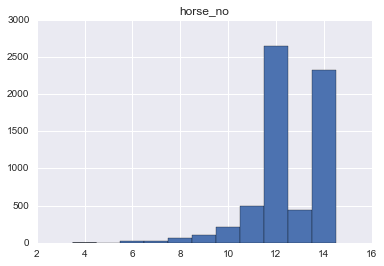

In [6]:
pd.pivot_table(run, index=['race_id'], values=['horse_no'], aggfunc='count').hist(bins=np.linspace(3.5,14.5,12))
plt.show()